# PHP - Pulsating Heat Pipe [DI water, 40FR]
Data collection and preparation for data analysis and machine learning 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno
sns.set()
import glob
from mdf import mdf

# Using MDF functions

Loading mdf class

In [2]:
mdf('data/di_water_exp/40_FR/')

Loading data from: data/di_water_exp/40_FR/


loading data and converting to MKS system

In [3]:
# loading and preparing data
df, df_conv = mdf.DataETL('data/di_water_exp/40_FR/')

Compiled and converted data is saved at: data/di_water_exp/40_FR/'combined_converted_data.csv'


In [4]:
df_conv

,t(min),Te[K],Tc[K],dT[K],P[bar],TR[K/W]
0,0.0,301.150000,301.15,0.000000,0.279977,0.000000
1,0.5,301.950000,301.15,0.800000,0.279977,0.010000
2,1.0,302.750000,301.40,1.350000,0.279977,0.016875
3,1.5,304.350000,301.90,2.450000,0.279977,0.030625
4,2.0,305.950000,302.15,3.800000,0.279977,0.047500
...,...,...,...,...,...,...
461,48.0,367.483333,344.15,23.333333,1.160357,0.291667
462,48.5,368.150000,343.65,24.500000,1.160357,0.306250
463,49.0,367.150000,344.15,23.000000,1.160357,0.287500
464,49.5,368.483333,343.65,24.833333,1.160357,0.310417


GFE calculation and DF preparation

In [5]:
# GFE calculation
df_gfe = mdf.GibbsFE(df_conv, "data/di_water_exp/40_FR/")

Gibbs Free Energy calculated data saved at: data/di_water_exp/40_FR/'gfe_combined.csv


In [6]:
df_gfe

,t(min),Te[K],Tc[K],dT[K],P[bar],TR[K/W],GFE [KJ/mol],GFE_Tc [KJ/mol],dG [KJ/mol]
0,0.0,301.150000,301.15,0.000000,0.279977,0.000000,-3187.408910,-3187.408910,0.000000
1,0.5,301.950000,301.15,0.800000,0.279977,0.010000,-3195.876209,-3187.408910,-8.467299
2,1.0,302.750000,301.40,1.350000,0.279977,0.016875,-3204.343508,-3190.054941,-14.288567
3,1.5,304.350000,301.90,2.450000,0.279977,0.030625,-3221.278106,-3195.347003,-25.931104
4,2.0,305.950000,302.15,3.800000,0.279977,0.047500,-3238.212704,-3197.993034,-40.219671
...,...,...,...,...,...,...,...,...,...
461,48.0,367.483333,344.15,23.333333,1.160357,0.291667,454.402393,425.550139,28.852254
462,48.5,368.150000,343.65,24.500000,1.160357,0.306250,455.226743,424.931876,30.294867
463,49.0,367.150000,344.15,23.000000,1.160357,0.287500,453.990218,425.550139,28.440079
464,49.5,368.483333,343.65,24.833333,1.160357,0.310417,455.638918,424.931876,30.707042


# General Raw Data Visualisation

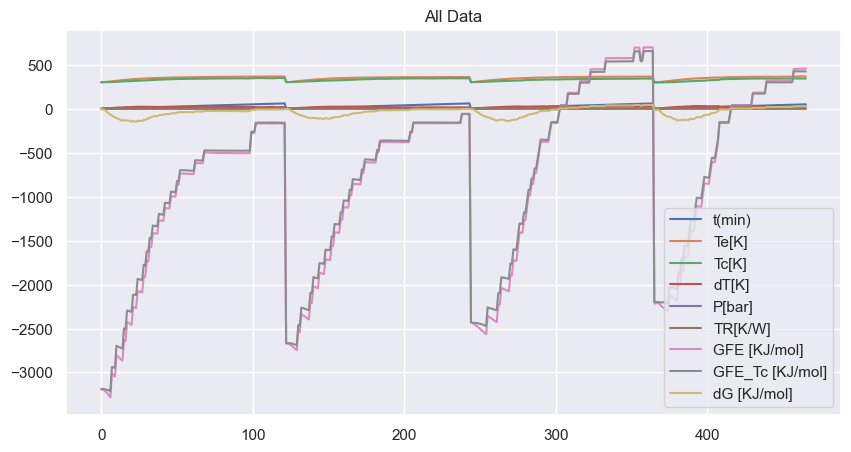

In [7]:
# plotting all data
mdf.PlotAllData(df_gfe)

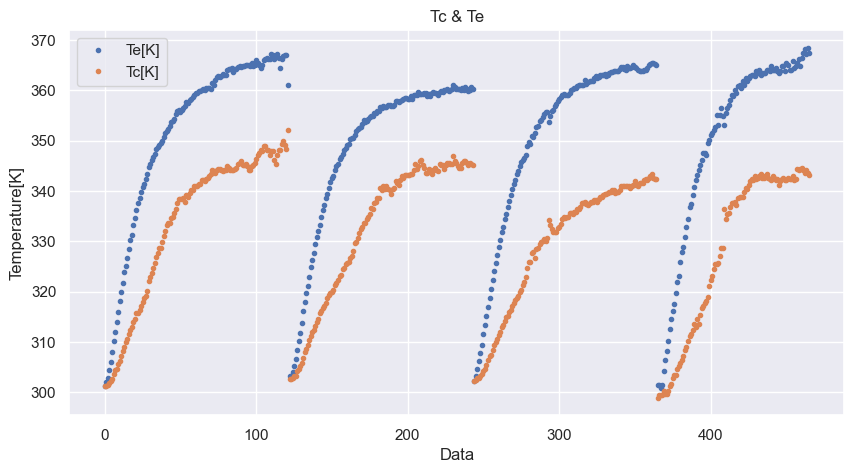

In [8]:
# plotting raw converted data of Tc and Te
mdf.PlotTempData(df_gfe)

# Data Analysis

Data selection (chopping) as per Te temperature

In [9]:
df_selected = mdf.DataChop(df_gfe,300,400)

Optimal range of temperature(Te) for data selection: [Tmin:300.8167, Tmax:368]


In [10]:
df_selected

,t(min),Te[K],Tc[K],dT[K],P[bar],TR[K/W],GFE [KJ/mol],GFE_Tc [KJ/mol],dG [KJ/mol]
0,0.0,301.150000,301.15,0.000000,0.279977,0.000000,-3187.408910,-3187.408910,0.000000
1,0.5,301.950000,301.15,0.800000,0.279977,0.010000,-3195.876209,-3187.408910,-8.467299
2,1.0,302.750000,301.40,1.350000,0.279977,0.016875,-3204.343508,-3190.054941,-14.288567
3,1.5,304.350000,301.90,2.450000,0.279977,0.030625,-3221.278106,-3195.347003,-25.931104
4,2.0,305.950000,302.15,3.800000,0.279977,0.047500,-3238.212704,-3197.993034,-40.219671
...,...,...,...,...,...,...,...,...,...
461,48.0,367.483333,344.15,23.333333,1.160357,0.291667,454.402393,425.550139,28.852254
462,48.5,368.150000,343.65,24.500000,1.160357,0.306250,455.226743,424.931876,30.294867
463,49.0,367.150000,344.15,23.000000,1.160357,0.287500,453.990218,425.550139,28.440079
464,49.5,368.483333,343.65,24.833333,1.160357,0.310417,455.638918,424.931876,30.707042


Data re-arrange, grouping and caculation for mean & std

In [11]:
df_mean, df_std = mdf.DataArrange(df_selected, 'data/di_water_exp/40_FR/')

Calculated mean and standard deviation values saved at data/di_water_exp/40_FR/'combined_mean.csv' and 'combined_std.csv'


In [12]:
df_mean

,Te[K],t(min),Tc[K],dT[K],P[bar],TR[K/W],GFE [KJ/mol],GFE_Tc [KJ/mol],dG [KJ/mol]
0,300.816667,1.000000,299.400000,1.416667,0.413299,0.017708,-2209.833472,-2199.426478,-10.406995
1,301.150000,0.000000,301.150000,0.000000,0.279977,0.000000,-3187.408910,-3187.408910,0.000000
2,301.483333,0.666667,299.233333,2.250000,0.413299,0.028125,-2214.730882,-2198.202125,-16.528756
3,301.950000,0.500000,301.150000,0.800000,0.279977,0.010000,-3195.876209,-3187.408910,-8.467299
4,302.150000,0.000000,302.150000,0.000000,0.379969,0.000000,-2430.851396,-2430.851396,0.000000
...,...,...,...,...,...,...,...,...,...
221,366.950000,58.333333,348.483333,18.466667,0.946588,0.230833,-167.462381,-159.034879,-8.427502
222,367.150000,53.666667,346.400000,20.750000,1.017845,0.259375,39.627637,36.118359,3.509278
223,367.483333,49.000000,343.650000,23.833333,1.160357,0.297917,454.402393,424.931876,29.470517
224,368.150000,48.500000,343.650000,24.500000,1.160357,0.306250,455.226743,424.931876,30.294867


In [13]:
df_std

,Te[K],t(min),Tc[K],dT[K],P[bar],TR[K/W],GFE [KJ/mol],GFE_Tc [KJ/mol],dG [KJ/mol]
2,301.483333,0.763763,0.288675,0.288675,0.000000,0.003608,0.000000,2.120640,2.120640
6,303.150000,0.288675,0.144338,0.144338,0.019243,0.001804,133.593510,134.534389,0.940880
21,310.150000,0.288675,2.362908,2.362908,0.066661,0.029536,502.917291,504.688198,13.301729
32,316.150000,0.353553,2.828427,2.828427,0.047137,0.035355,300.428190,310.592307,10.164116
63,330.350000,0.000000,0.353553,0.353553,0.000000,0.004419,0.000000,2.597243,2.597243
...,...,...,...,...,...,...,...,...,...
216,366.150000,4.034229,1.947220,1.947220,0.087271,0.024340,253.053104,238.557074,14.506581
217,366.350000,2.828427,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
221,366.950000,2.466441,0.629153,0.629153,0.000000,0.007864,0.000000,0.287122,0.287122
222,367.150000,4.163332,1.984313,1.984313,0.123420,0.024804,358.848522,337.257858,21.591385


Calculating of average value of all thermal properties

# Data Visualisation after Data Analysis

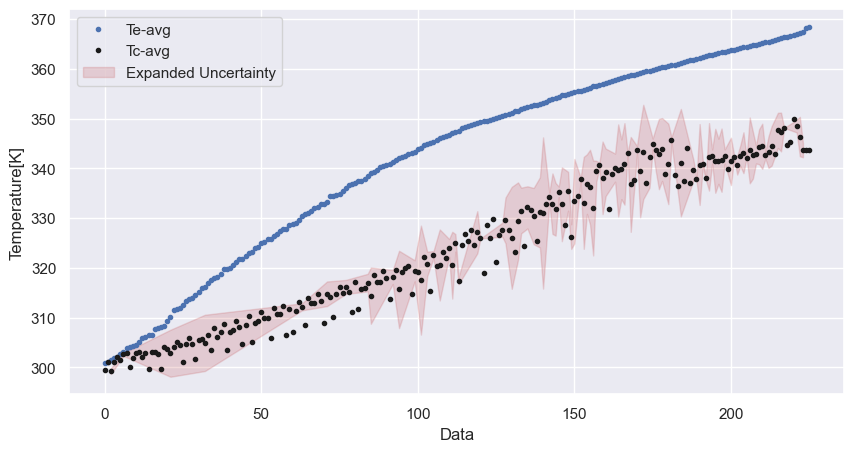

In [14]:
# plotting EU for Tc and Te
mdf.PlotEUTemp(df_mean, df_std)

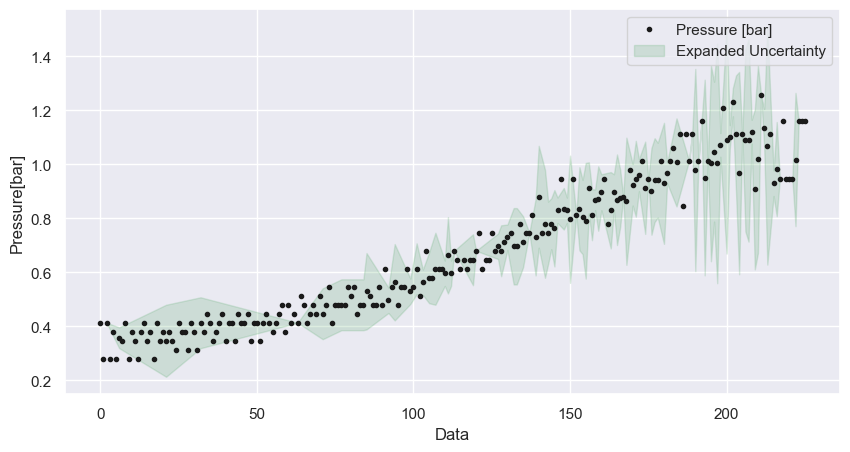

In [15]:
# plotting pressure
mdf.PlotEUPres(df_mean, df_std)

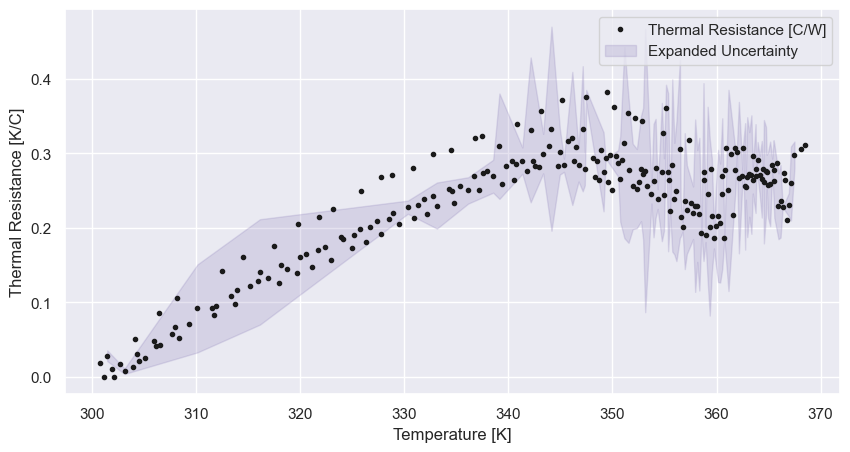

In [16]:
# plotting TR
mdf.PlotEUTR(df_mean,df_std)

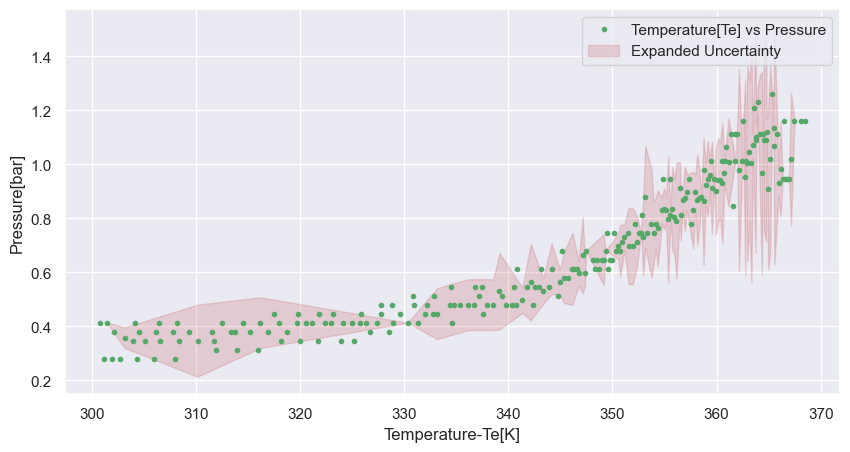

In [17]:
# plotting TP graph
mdf.PlotEUTP(df_mean,df_std)

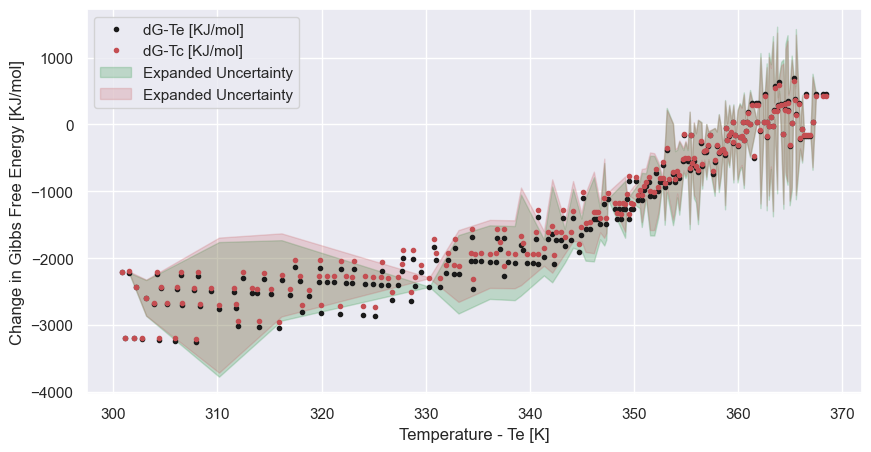

In [18]:
# plotting GFE at Te and Tc
mdf.PlotEUGFE(df_mean, df_std)

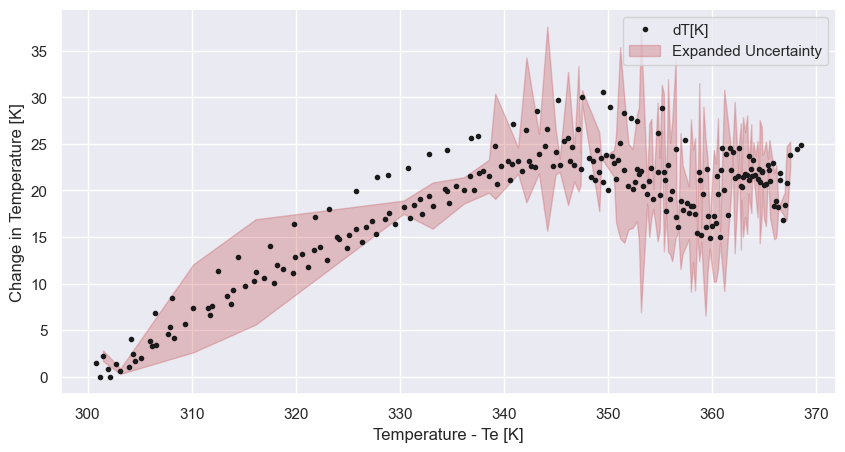

In [19]:
# plotting dT
mdf.PlotEUdT(df_mean, df_std)

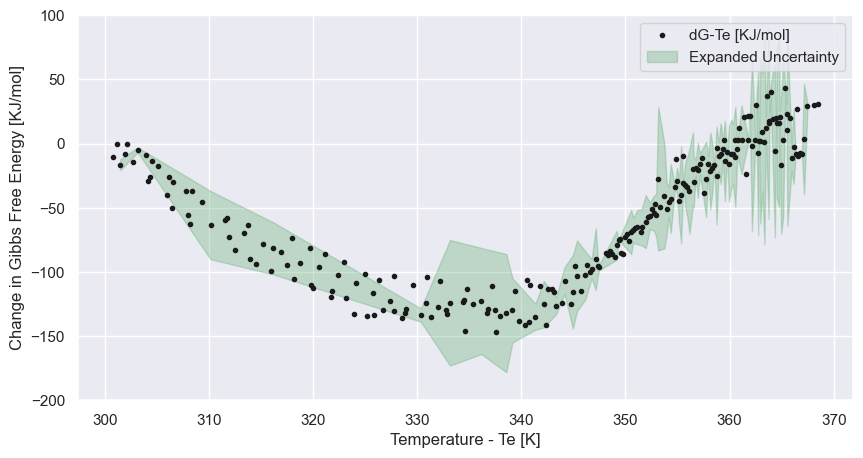

In [20]:
# plotting dG
mdf.PlotEUdG(df_mean, df_std)

# Data Analysis Result

In [21]:
mdf.DataPropAvg(df_mean, df_std)

Tc  average:     323.712 +- 2.1346 [K]
P   average:     0.6743 +- 0.0613 [bar]
dT  average:     18.4649 +- 2.1346 [K]
TR  average:     0.2308 +- 0.0267 [K/W]
GFE average:     -1289.4411 +- 218.0993 [KJ/mol]



Finding best G(T,P) with lowest dG value

In [22]:
mdf.BestTP(df_mean)

Optimal G(T,P) condition at lowest (optimal) dG[-146.7584]
Te optimal:        337.55[K] 
P  optimal:        0.4466[bar] 
dT optimal:        21.9[K] 
TR optimal:        0.2738[K/W] 
GFE optimal:       dG(337.55, 0.4466) = -2262.022 [KJ/mol]

